<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 

Author: [Yury Kashnitskiy](https://yorko.github.io). Translated by [Sergey Oreshkov](https://www.linkedin.com/in/sergeoreshkov/). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center> Assignment #8 (demo)

## <center> Implementation of online regressor
    
**Same assignment as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/a8-demo-implementing-online-regressor) + [solution](https://www.kaggle.com/kashnitsky/a8-demo-implementing-online-regressor-solution).**

Here we'll implement a regressor trained with stochastic gradient descent (SGD). Fill in the missing code. If you do evething right, you'll pass a simple embedded test.

## <center>Linear regression and Stochastic Gradient Descent

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.base import BaseEstimator
from sklearn.metrics import mean_squared_error, log_loss, roc_auc_score
from sklearn.model_selection import train_test_split
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

Implement class `SGDRegressor`. Specification:
- class is inherited from `sklearn.base.BaseEstimator`
- constructor takes parameters `eta` – gradient step ($10^{-3}$ by default) and `n_epochs` – dataset pass count (3 by default)
- constructor also creates `mse_` and `weights_` lists in order to track mean squared error and weight vector during gradient descent iterations
- Class has `fit` and `predict` methods
- The `fit` method takes matrix `X` and vector `y` (`numpy.array` objects) as parameters, appends column of ones to  `X` on the left side, initializes weight vector `w` with **zeros** and then makes `n_epochs` iterations of weight updates (you may refer to this [article](https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-8-vowpal-wabbit-fast-learning-with-gigabytes-of-data-60f750086237) for details), and for every iteration logs mean squared error and weight vector `w` in corresponding lists we created in the constructor. 
- Additionally the `fit` method will create `w_` variable to store weights which produce minimal mean squared error
- The `fit` method returns current instance of the `SGDRegressor` class, i.e. `self`
- The `predict` method takes `X` matrix, adds column of ones to the left side and returns prediction vector, using weight vector `w_`, created by the `fit` method.

In [3]:
class SGDRegressor(BaseEstimator):
    # you code here
    def __init__(self, eta=1e-3, n_epochs=5):
        self.eta = eta
        self.n_epochs = n_epochs
        self.mse_ = list()
        self.weights_ = list()
        
    def fit(self, X, y):
        # Add bias column to X
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        
        #Initialize w
        w = np.random.normal(0, 0.1, X.shape[1])
        
        for i in tqdm(range(self.n_epochs)):
            for j in range(X.shape[0]):
                w_copy = w.copy()
                dist = y[j] - w.dot(X[j, :])
                w_copy[0] += self.eta * dist
                for k in range(1, X.shape[1]):
                    w_copy[k] += self.eta * dist * X[j, k]
                    
                w = w_copy
                
                self.weights_.append(w)
                self.mse_.append(mean_squared_error(y, X.dot(w)))
                
        self.best_w_ = self.weights_[np.argmin(self.mse_)]
        self.best_mse_ = self.mse_[np.argmin(self.mse_)]
        return self
                               
    def predict(self, X):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        return X.dot(self.best_w_)

Let's test out the algorithm on height/weight data. We will predict heights (in inches) based on weights (in lbs).

In [4]:
data_demo = pd.read_csv('../../data/weights_heights.csv')

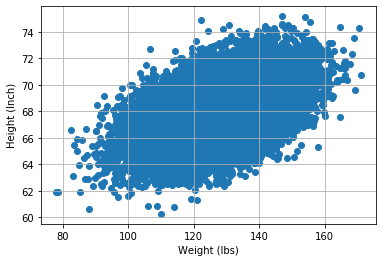

In [5]:
plt.scatter(data_demo['Weight'], data_demo['Height']);
plt.xlabel('Weight (lbs)')
plt.ylabel('Height (Inch)')
plt.grid();

In [6]:
X, y = data_demo['Weight'].values, data_demo['Height'].values

Perform train/test split and scale data.

In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                     test_size=0.3,
                                                     random_state=17)

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape([-1, 1]))
X_valid_scaled = scaler.transform(X_valid.reshape([-1, 1]))

Train created `SGDRegressor` with `(X_train_scaled, y_train)` data. Leave default parameter values for now.

In [9]:
reg = SGDRegressor(n_epochs=3)

In [10]:
reg.fit(X_train_scaled, y_train)

100%|██████████| 3/3 [00:14<00:00,  4.73s/it]


SGDRegressor(eta=0.001, n_epochs=3)

Draw a chart with training process  – dependency of mean squared error from the i-th SGD iteration number.

Text(0, 0.5, 'Mean Squared Errors')

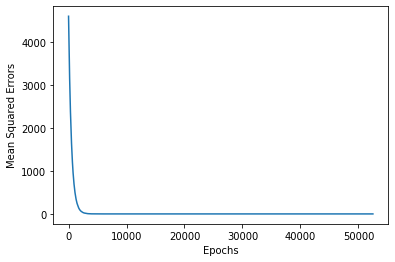

In [11]:
plt.plot(reg.mse_)
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Errors')

Print the minimal value of mean squared error and the best weights vector.

In [12]:
reg.best_mse_, reg.best_w_

(2.715135240613339, array([67.98985012,  0.94447634]))

Draw chart of model weights ($w_0$ and $w_1$) behavior during training.

[Text(0.5, 15.0, '$Epochs$')]

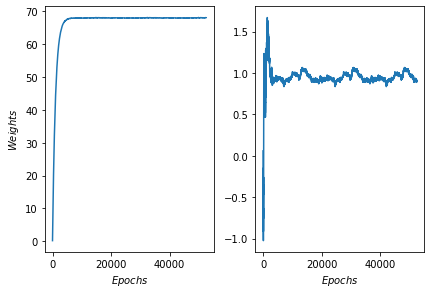

In [13]:
fig, axs = plt.subplots(1, 2)
fig.tight_layout()

axs[0].plot([w[0] for w in reg.weights_])
axs[0].set(xlabel= '$Epochs$', ylabel= '$Weights$')
axs[1].plot([w[1] for w in reg.weights_])
axs[1].set(xlabel='$Epochs$')

Make a prediction for hold-out  set `(X_valid_scaled, y_valid)` and check MSE value.

In [14]:
# you code here
sgd_holdout_mse = mean_squared_error(y_valid, reg.predict(X_valid_scaled))

In [15]:
sgd_holdout_mse

2.670868112087243

Do the same thing for `LinearRegression` class from `sklearn.linear_model`. Evaluate MSE for hold-out set.

In [16]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
linreg_holdout_mse = mean_squared_error(y_valid, lr.predict(X_valid_scaled))
linreg_holdout_mse

2.670830767667635

In [17]:
lr.coef_, lr.intercept_

(array([0.94537278]), 67.98930834742858)

In [18]:
try:
    assert (sgd_holdout_mse - linreg_holdout_mse) < 1e-4
    print('Correct!')
except AssertionError:
    print("Something's not good.")
          
print("Linreg's holdout MSE: {}"
          "\nSGD's holdout MSE: {}".format(linreg_holdout_mse, 
                                            sgd_holdout_mse))

Correct!
Linreg's holdout MSE: 2.670830767667635
SGD's holdout MSE: 2.670868112087243
